# Model Evaluation Exercise: Hyperparameter Tuning

In today's session, you learned about how to evaluate a model to determine whether it has good performance. In this exercise, you are going to use what you have learned in carrying out **hyperparameter tuning**.   
  
Hyperparameters are values in our machine learning model that we have to set, but that are not learned from the data. For example, when we used a random forest model, we used the following code: 
  
```
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
``` 
  
Here, `n_estimators` and `random_state` are the hyperparameters. We set them and give them values and the model changes depending on what those values are, but there is no way to directly *learn* the values from the data. `n_estimators` is the number of decision trees in our random forest and `random_state` is the "seed" used in random number generation, which guarantees our model will be reproducible.

In this notebook, you are going to vary the hyperparameters of your random forest model that you used to classify HNSC patients based on their HPV status. By carrying out multiple steps of model evaluation, you are going to build the most optimal random forest model that you can to solve this problem.  

If you get stuck at any point in this notebook, you can look at the `model_evaluation.ipynb` notebook that we went through in class for guidance or you can raise your hand and one of the course instructors will come over to help you

## 1) Build a random forest classifier for the HPV status  
  
This is exactly the same as your homework task: you can copy and paste over the code needed to do this.  
  

Remember you need to: 
- import libraries
- read in data 
- split into features and outcome
- train test split
- build a random forest model. 
  
In the below cells, complete the code to train the model.

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("dataset/hnsc_dataset_scaled.csv", index_col = 0)

y = df["HPV_Status"]
X = df.drop(columns = "HPV_Status")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
rf_model = RandomForestClassifier(random_state = 42)

In [5]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 2) Now evaluate that model. 
  
Some ways to evaluate the model that you might want to use are 
* accuracy 
* f1-score
* the ROC curve
* the area under the ROC curve

In [6]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

In [7]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label = "Positive")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label = "Positive")

In [8]:
print(accuracy)

0.9795918367346939


In [9]:
print(f1)

0.9883720930232558


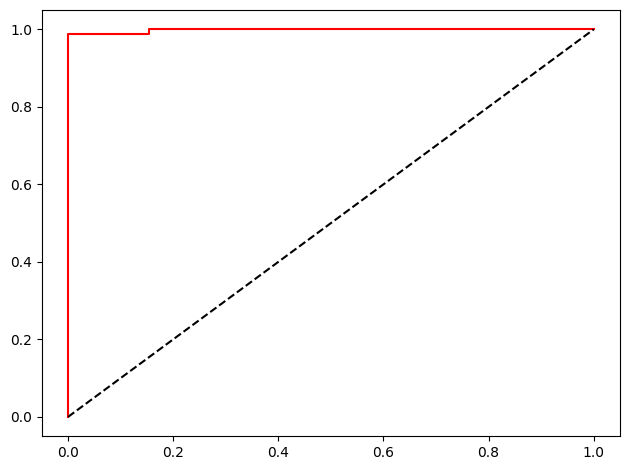

In [10]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color = 'red')
ax.plot([0, 1], [0, 1], linestyle = '--', color = 'black')
fig.tight_layout()
plt.show()

## 3) Now build a new model and evaluate it
  
Now, using the same data, try to build a new random forest model. You can change the hyperparameters any way that you want. The table below shows all of the hyperparameters and some example values that they can take.  
  
Once you've built the model, carry out model evaluation (as you did above) to see whether the model you have built is better or worse than the base model

| Hyperparameter           | What It Controls                                             | Example Values             |
|--------------------------|--------------------------------------------------------------|----------------------------|
| `n_estimators`           | Number of trees in the forest                                | 100, 200, 500, 1000              |
| `max_depth`              | Maximum depth of each tree (limits how complex a tree can be)| None, 5, 10, 20            |
| `min_samples_split`      | Minimum number of samples to split an internal node          | 2, 5, 10                   |
| `min_samples_leaf`       | Minimum number of samples at a leaf node                     | 1, 2, 4                    |

In [11]:
rf_model_2 = RandomForestClassifier(random_state = 42, n_estimators = 1000, max_depth = None)

In [12]:
rf_model_2.fit(X_train, y_train)

y_pred_2 = rf_model_2.predict(X_test)
y_pred_proba2 = rf_model_2.predict_proba(X_test)[:,1]

In [13]:
accuracy_new = accuracy_score(y_test, y_pred_2)
f1_new = f1_score(y_test, y_pred_2, pos_label = "Positive")
fpr_new, tpr_new, thresholds_new = roc_curve(y_test, y_pred_proba2, pos_label = "Positive")

In [14]:
print(accuracy_new)

0.9795918367346939


In [15]:
print(f1_new)

0.9883720930232558


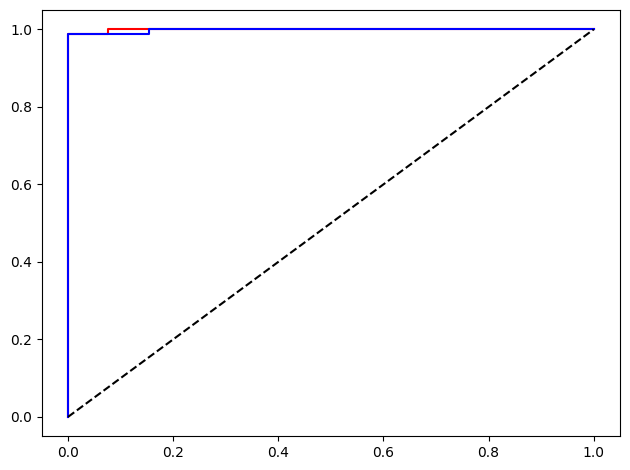

In [17]:
fig, ax = plt.subplots()
ax.plot(fpr_new, tpr_new, color = 'red')
ax.plot(fpr, tpr, color = 'blue')
ax.plot([0, 1], [0, 1], linestyle = '--', color = 'black')
fig.tight_layout()
plt.show()

In this case, the new model is *very slightly* better than the old one. The old model is pretty close to optimal already though!

## 4) What about another set of hyperparameters?  
  
If you've got this far, how about trying to come up with another set of hyperparameters? How does that affect the model?  
  
In reality, hyperparameter optimisation for machine learning is an extremely long and tedious process! You try out hundreds of different sets of hyperparameters to build the best possible model. We are giving you a flavour of what that is like here. 

### Bonus. 
  
There is an error in what we have asked you to do in this notebook. Can you think what it might be?    
It relates to the train-test splitting of models. Remember that the test set must stay independent and unseen, what have we done wrong here?

The issue is that we have indirectly used our test set in training!
By using the test set to identify whether the set of hyperparameters improves the model or not, our test set is no longer independent! This is an example of what is called "test train leakage". You need another test set that stays fully independent if you were being careful.
